# Lab 5- Programming assignment 1 instructions

640: Lab#5

Lab goal: 
<br>      1) understand the code about 2-layer neural network without any hidden layers                                             <br>      2) learn how to implement a 3-layer neural network with 1 hidden layer               



In [1]:
# Import Python libraries
import numpy as np    # numpy is the fundamental package for scientific computing with Python, such linear algebra, array...
from PIL import Image
import matplotlib.pyplot as plt      # matplotlib is a Python 2D plotting library which produces publication quality figures.

## Logistic Regression Model 


In [2]:
class LogisticRegression:
    """
    This lab implements a Logistic Regression Classifier.
    """
    
    def __init__(self, input_dim, output_dim,i=1,hidden_node =20):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
        """
        
        if i ==1:
            # 3-layer from hidden layer to input
            self.theta1 = np.random.randn(input_dim, hidden_node)/ np.sqrt(input_dim)
            self.bias1 = np.zeros((1, hidden_node))
            #from output to hidden layer
            self.theta2 = np.random.randn(hidden_node, output_dim)/ np.sqrt(hidden_node)
            self.bias2 = np.zeros((1, output_dim))
        else:
                
            self.theta = np.random.randn(input_dim, output_dim) / np.sqrt(input_dim)       
            self.bias = np.zeros((1, output_dim))
        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        z = np.dot(X,self.theta) + self.bias
        exp_z = np.exp(z)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return 1./num_examples * data_loss

    def compute_cost_NN(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        z1 = np.dot(X, self.theta1) + self.bias1
        tanh_z1 = np.tanh(z1)

        z2 = np.dot(tanh_z1, self.theta2) + self.bias2
        exp_z2 = np.exp(z2)
        softmax_scores = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return 1./num_examples * data_loss    
    

    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z = np.dot(X,self.theta) + self.bias
        exp_z = np.exp(z)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions

    def predict_NN(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z1 = np.dot(X, self.theta1) + self.bias1
        tanh_z1 = np.tanh(z1)

        z2 = np.dot(tanh_z1, self.theta2) + self.bias2
        exp_z2 = np.exp(z2)
        softmax_scores = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
        predictions = np.argmax(softmax_scores, axis=1)
        return predictions
    #--------------------------------------------------------------------------
    # TODO: implement logistic regression using gradient descent 
    #--------------------------------------------------------------------------

    def fit_NN(self, X, y, num_epochs=1000, lr=0.001):
        num_examples = np.shape(X)[0]

        for epoch in range(num_epochs):
            # Forward propagation.
            z1 = np.dot(X, self.theta1) + self.bias1
            tanh_z1 = np.tanh(z1)

            z2 = np.dot(tanh_z1, self.theta2) + self.bias2
            exp_z2 = np.exp(z2)
            softmax_scores = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)

            # Backpropagation.
            one_hot_y = np.zeros((num_examples, np.max(y) + 1))
            for i in range(num_examples):
                one_hot_y[i, y[i]] = 1
            delta3 = softmax_scores - one_hot_y
            delta2 = np.dot(delta3, self.theta2.T) * (1 - np.power(tanh_z1, 2))

            # Gradient computation.
            dtheta2 = np.dot(tanh_z1.T, delta3)
            dbias2 = np.sum(delta3, axis=0, keepdims=True)
            dtheta1 = np.dot(X.T, delta2)
            dbias1 = np.sum(delta2, axis=0, keepdims=True)

            # Gradient descent parameter update
            self.theta2 -= lr * dtheta2
            self.bias2 -= lr * dbias2
            self.theta1 -= lr * dtheta1
            self.bias1 -= lr * dbias1
        return 0

    def fit_NN_over(self, X, y, num_epochs=1000, lr=0.001,lamd = 0.01):
        num_examples = np.shape(X)[0]

        for epoch in range(num_epochs):
            # Forward propagation.
            z1 = np.dot(X, self.theta1) + self.bias1
            tanh_z1 = np.tanh(z1)

            z2 = np.dot(tanh_z1, self.theta2) + self.bias2
            exp_z2 = np.exp(z2)
            softmax_scores = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)

            # Backpropagation.
            one_hot_y = np.zeros((num_examples, np.max(y) + 1))
            for i in range(num_examples):
                one_hot_y[i, y[i]] = 1
            delta3 = softmax_scores - one_hot_y
            delta2 = np.dot(delta3, self.theta2.T) * (1 - np.power(tanh_z1, 2))

            # Gradient computation.
            dtheta2 = np.dot(tanh_z1.T, delta3) + lamd*np.power(self.theta2,2)
            dbias2 = np.sum(delta3, axis=0, keepdims=True) 
            dtheta1 = np.dot(X.T, delta2) + lamd*np.power(self.theta1,2)
            dbias1 = np.sum(delta2, axis=0, keepdims=True)

            # Gradient descent parameter update
            self.theta2 -= lr * dtheta2
            self.bias2 -= lr * dbias2
            self.theta1 -= lr * dtheta1
            self.bias1 -= lr * dbias1
        return 0

    
    def fit(self,X,y,num_epochs=1000,lr=0.01):
        for epoch in range(0, num_epochs):

            # Forward propagation
            z = np.dot(X,self.theta) + self.bias
            exp_z = np.exp(z)
            softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
            # Backpropagation
            beta = np.zeros_like(softmax_scores)
            one_hot_y = np.zeros_like(softmax_scores)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
            beta = softmax_scores - one_hot_y
    
            # Compute gradients of model parameters
            dtheta = np.dot(X.T,beta)
            dbias = np.sum(beta, axis=0)
    
            # Gradient descent parameter update
            self.theta -= lr * dtheta
            self.bias -= lr * dbias
            
        return 0
    
    def fit_over(self,X,y,num_epochs=1000,lr=0.01,lamd = 0.01):
        for epoch in range(0, num_epochs):

            # Forward propagation
            z = np.dot(X,self.theta) + self.bias
            exp_z = np.exp(z)
            softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
            # Backpropagation
            beta = np.zeros_like(softmax_scores)
            one_hot_y = np.zeros_like(softmax_scores)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
            beta = softmax_scores - one_hot_y
    
            # Compute gradients of model parameters
            dtheta = np.dot(X.T,beta) + lamd*np.power(self.theta,2)
            dbias = np.sum(beta, axis=0)
    
            # Gradient descent parameter update
            self.theta -= lr * dtheta
            self.bias -= lr * dbias
            
        return 0

In [3]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

In [4]:
def plot_decision_boundary_NN(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict_NN(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

## 2-layer linear

## Initialization

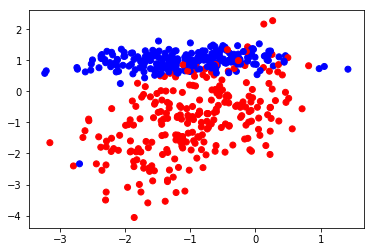

In [5]:
#1. Load and plot data
X = np.genfromtxt('DATA/linearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/linearY.csv', delimiter=',').astype(np.int64)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.savefig('/Users/airwolf/Desktop/1.png')
plt.show()

In [6]:
#2. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = LogisticRegression(input_dim, output_dim,i=0)

## Train Classification Model

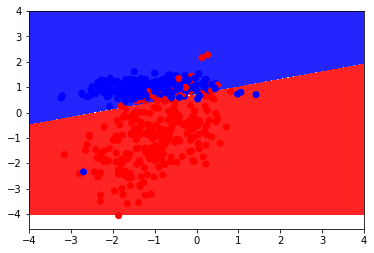

In [7]:
#3. Train the model, plot decision boundary after trainning
logreg.fit(X,y,1000,lr=0.001)
plot_decision_boundary(logreg, X, y)

## Model Evaluation

In [8]:
#4. compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.93
CONFUSION MATRIX: 
 [[ 244.   29.]
 [   6.  221.]]


In [9]:
#5. compute cost
cost = logreg.compute_cost(X,y)
print (cost)

0.207171752579


## 2-layer Nonlinear

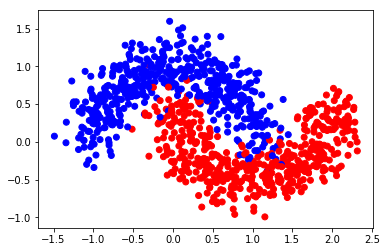

In [10]:
#1. Load and plot data
X = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.savefig('/Users/airwolf/Desktop/1.png')
plt.show()

In [11]:
#2. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = LogisticRegression(input_dim, output_dim,i=0)

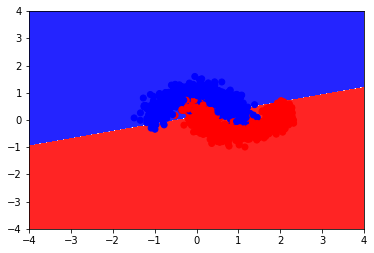

In [12]:
#3. Train the model, plot decision boundary after trainning
logreg.fit(X,y,1000,lr=0.001)
plot_decision_boundary(logreg, X, y)

In [13]:
#4. compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.875
CONFUSION MATRIX: 
 [[ 437.   62.]
 [  63.  438.]]


In [14]:
#5. compute cost
cost = logreg.compute_cost(X,y)
print (cost)

0.290882470401


## 3-layer Model

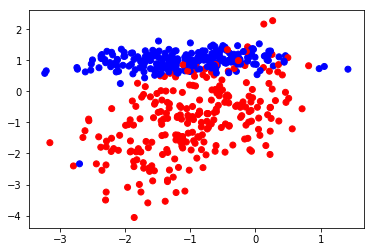

In [15]:
#1. Load and plot data
X = np.genfromtxt('DATA/linearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/linearY.csv', delimiter=',').astype(np.int64)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.show()

In [16]:
#2. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = LogisticRegression(input_dim, output_dim,i=1)

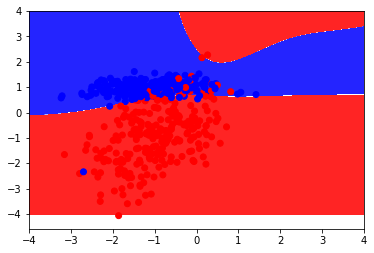

In [17]:
#3. Train the model, plot decision boundary after trainning
logreg.fit_NN(X,y,1000,lr=0.001)
plot_decision_boundary_NN(logreg, X, y)

In [18]:
#4. compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict_NN(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.946
CONFUSION MATRIX: 
 [[ 243.   20.]
 [   7.  230.]]


In [19]:
#5. compute cost
cost = logreg.compute_cost_NN(X,y)
print (cost)

0.136419928301


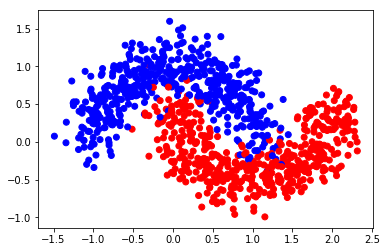

In [20]:
#1. Load and plot data
X = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.show()

In [21]:
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = LogisticRegression(input_dim, output_dim,i=1)

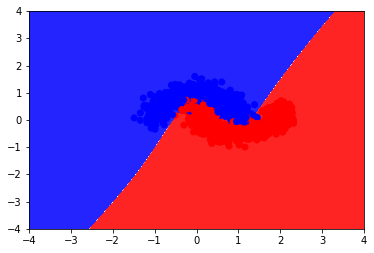

In [22]:
#3. Train the model, plot decision boundary after trainning
logreg.fit_NN(X,y,1000,lr=0.001)
plot_decision_boundary_NN(logreg, X, y)

In [23]:
#4. compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict_NN(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.966
CONFUSION MATRIX: 
 [[ 483.   17.]
 [  17.  483.]]


In [24]:
#5. compute cost
cost = logreg.compute_cost_NN(X,y)
print (cost)

0.0825241897991


## Compare Learning Rate

## linear data

In [25]:
#1. Load and plot data
X = np.genfromtxt('DATA/linearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/linearY.csv', delimiter=',').astype(np.int64)

The accuracy when learning rate is 0.001 is 0.9488
The accuracy when learning rate is 0.002 is 0.9522
The accuracy when learning rate is 0.003 is 0.957
The accuracy when learning rate is 0.004 is 0.9596
The accuracy when learning rate is 0.005 is 0.9642
The accuracy when learning rate is 0.006 is 0.9744
The accuracy when learning rate is 0.007 is 0.9764
The accuracy when learning rate is 0.008 is 0.9788
The accuracy when learning rate is 0.009 is 0.9822


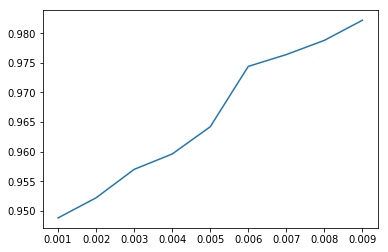

In [26]:
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
result = []
minNodes = 20
maxNodes = 200
numTest = 10;
logreg = LogisticRegression(input_dim, output_dim, 1, 20)
list2 = []
for i in range(1, 10):
    list2.append(i / 1000)
list1 = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006,0.007,0.008,0.009]

for i in list1:
    total = []
    for test in range(numTest):
        logreg.fit_NN(X,y,1000,lr=i)
        acc = 0
        y_pred = logreg.predict_NN(X)
        con_mat = np.zeros((output_dim, output_dim))
        for p in range(len(y_pred)):
            con_mat[y_pred[p], y[p]] += 1
            if y[p] == y_pred[p]:
                acc += 1
        acc = acc/len(y_pred)
        total.append(acc)
    acc = np.mean(total)
    print("The accuracy when learning rate is", i, "is",acc)
    result.append(acc)
plt.plot(list1,result) 
plt.show()

## Nonlinear data

In [27]:
X = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)

The accuracy when learning rate is 0.001 is 0.9687
The accuracy when learning rate is 0.002 is 0.9719
The accuracy when learning rate is 0.003 is 0.9688
The accuracy when learning rate is 0.004 is 0.9681
The accuracy when learning rate is 0.005 is 0.9703
The accuracy when learning rate is 0.006 is 0.9706
The accuracy when learning rate is 0.007 is 0.9711
The accuracy when learning rate is 0.008 is 0.9678
The accuracy when learning rate is 0.009 is 0.9719


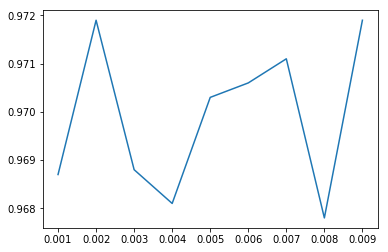

In [28]:
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
result = []
minNodes = 20
maxNodes = 200
numTest = 10;
logreg = LogisticRegression(input_dim, output_dim, 1, 20)
list2 = []
for i in range(1, 10):
    list2.append(i / 1000)
list1 = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006,0.007,0.008,0.009]

for i in list1:
    total = []
    for test in range(numTest):
        logreg.fit_NN(X,y,1000,lr=i)
        acc = 0
        y_pred = logreg.predict_NN(X)
        con_mat = np.zeros((output_dim, output_dim))
        for p in range(len(y_pred)):
            con_mat[y_pred[p], y[p]] += 1
            if y[p] == y_pred[p]:
                acc += 1
        acc = acc/len(y_pred)
        total.append(acc)
    acc = np.mean(total)
    print("The accuracy when learning rate is", i, "is",acc)
    result.append(acc)
plt.plot(list1,result) 
plt.show()

## Compare Number Nodes in Hidden Layer

## Linear data

In [29]:
#1. Load and plot data
X = np.genfromtxt('DATA/linearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/linearY.csv', delimiter=',').astype(np.int64)

The accuracy when number of node is 20 is 0.9466
The accuracy when number of node is 40 is 0.9472
The accuracy when number of node is 60 is 0.9498
The accuracy when number of node is 80 is 0.9502
The accuracy when number of node is 100 is 0.95
The accuracy when number of node is 120 is 0.9502
The accuracy when number of node is 140 is 0.9492
The accuracy when number of node is 160 is 0.95
The accuracy when number of node is 180 is 0.948


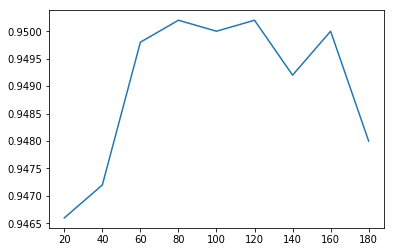

In [30]:
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
result = []
minNodes = 20
maxNodes = 200
numTest = 10;


for i in range(20, 200, 20):
    total = []
    for test in range(numTest):
        logreg = LogisticRegression(input_dim, output_dim, 1, i)
        logreg.fit_NN(X,y,1000,lr=0.001)
        acc = 0
        y_pred = logreg.predict_NN(X)
        con_mat = np.zeros((output_dim, output_dim))
        for p in range(len(y_pred)):
            con_mat[y_pred[p], y[p]] += 1
            if y[p] == y_pred[p]:
                acc += 1
        acc = acc/len(y_pred)
        total.append(acc)
    acc = np.mean(total)
    print("The accuracy when number of node is", i, "is",acc)
    result.append(acc)
plt.plot(range(20, 200, 20),result) 
plt.show()

## NonLinear data

In [31]:
X = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)

The accuracy when number of node is 20 is 0.9663
The accuracy when number of node is 40 is 0.9663
The accuracy when number of node is 60 is 0.9669
The accuracy when number of node is 80 is 0.9668
The accuracy when number of node is 100 is 0.9663
The accuracy when number of node is 120 is 0.9668
The accuracy when number of node is 140 is 0.9668
The accuracy when number of node is 160 is 0.9666
The accuracy when number of node is 180 is 0.9669


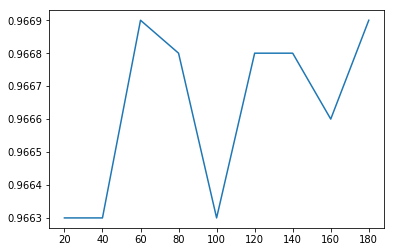

In [32]:
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
result = []
minNodes = 20
maxNodes = 200
numTest = 10;


for i in range(20, 200, 20):
    total = []
    for test in range(numTest):
        logreg = LogisticRegression(input_dim, output_dim, 1, i)
        logreg.fit_NN(X,y,1000,lr=0.001)
        acc = 0
        y_pred = logreg.predict_NN(X)
        con_mat = np.zeros((output_dim, output_dim))
        for p in range(len(y_pred)):
            con_mat[y_pred[p], y[p]] += 1
            if y[p] == y_pred[p]:
                acc += 1
        acc = acc/len(y_pred)
        total.append(acc)
    acc = np.mean(total)
    print("The accuracy when number of node is", i, "is",acc)
    result.append(acc)
plt.plot(range(20, 200, 20),result) 
plt.show()

## test over fit 2-layer and 3-layer

## 2-layer 

In [33]:
X = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)

In [34]:
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = LogisticRegression(input_dim, output_dim,i=0)

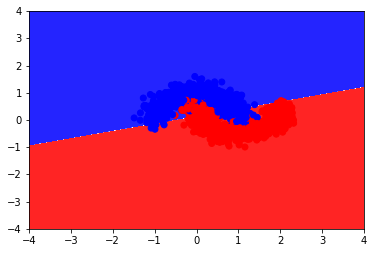

In [36]:
#3. Train the model, plot decision boundary after trainning
logreg.fit_over(X,y,1000,lr=0.001)
plot_decision_boundary(logreg, X, y)

In [37]:
#4. compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.875
CONFUSION MATRIX: 
 [[ 437.   62.]
 [  63.  438.]]


In [38]:
#5. compute cost
cost = logreg.compute_cost(X,y)
print (cost)

0.290882479857


## 3-layer

In [39]:
#1. Load and plot data
X = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)

In [40]:
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = LogisticRegression(input_dim, output_dim,i=1)

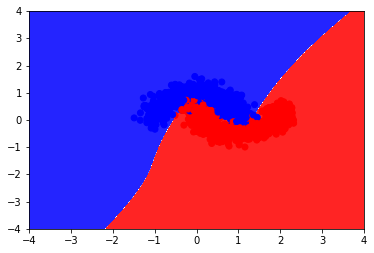

In [41]:
#3. Train the model, plot decision boundary after trainning
logreg.fit_NN_over(X,y,1000,lr=0.001)
plot_decision_boundary_NN(logreg, X, y)

In [42]:
#4. compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict_NN(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.967
CONFUSION MATRIX: 
 [[ 483.   16.]
 [  17.  484.]]


In [43]:
#5. compute cost
cost = logreg.compute_cost_NN(X,y)
print (cost)

0.0810422160768


## digit data

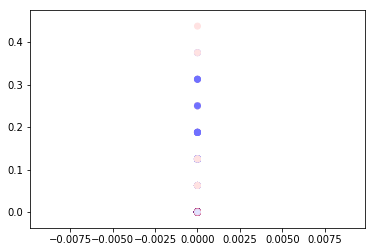

In [7]:
#1. Load and plot data
X = np.genfromtxt('DATA/Digit_X_train.csv', delimiter=',') 
y = np.genfromtxt('DATA/Digit_y_train.csv', delimiter=',').astype(np.int64)

X_test = np.genfromtxt('DATA/Digit_X_test.csv', delimiter=',') 
y_test = np.genfromtxt('DATA/Digit_y_test.csv', delimiter=',').astype(np.int64)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.show()
X = np.genfromtxt('DATA/Digit_X_train.csv', delimiter=',')
for i in range(5):
    data = np.reshape(255*X[i],(8,8)) #i--the ith digit
    image = Image.fromarray(data)
    image.show()

In [8]:
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = LogisticRegression(input_dim, output_dim,i=1)

In [9]:
#3. Train the model, plot decision boundary after trainning
logreg.fit_NN(X,y,1000,lr=0.001)
#plot_decision_boundary_NN(logreg, X, y)

0

In [11]:
#4. compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict_NN(X_test)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y_test[i]] += 1
    if y_test[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.9421579532814238
CONFUSION MATRIX: 
 [[ 86.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  81.   0.   0.   1.   0.   1.   0.   3.   0.]
 [  0.   0.  84.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   1.   2.  80.   0.   0.   0.   1.   0.   1.]
 [  1.   1.   0.   0.  84.   0.   0.   1.   1.   0.]
 [  0.   0.   0.   3.   0.  86.   0.   0.   2.   2.]
 [  1.   0.   0.   0.   4.   2.  90.   0.   0.   0.]
 [  0.   0.   0.   2.   0.   0.   0.  86.   0.   0.]
 [  0.   2.   0.   6.   0.   0.   0.   0.  81.   0.]
 [  0.   6.   0.   0.   3.   3.   0.   1.   1.  89.]]


In [12]:
#5. compute cost
cost = logreg.compute_cost_NN(X,y)
print (cost)

0.00695837778225
